In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *

In [ ]:
pip install pycaret[full]

In [ ]:
pip install interpret-community

**Data**

In [ ]:
#dataset
#from google.colab import files
#f=files.upload()

In [2]:
#Encoding method 1
df=pd.read_excel(r'C:\Users\Asus\Desktop/xrd_new.xlsx', sheet_name='Sheet6')

# Pycaret

# 💡
**keep FwHM and 2theta**

In [ ]:
x=df.drop(['Isc','schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)

reg = setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3

             ,keep_features=['FWHM 1', 'FWHM 2', 'FWHM 3', 'FWHM 4', 'FWHM 5',
       'FWHM 6', '2-theta 1', '2-theta 2', '2-theta 3', '2-theta 4',
       '2-theta 5', '2-theta 6','relative_intensity 1',
       'relative_intensity 2', 'relative_intensity 3', 'relative_intensity 4',
       'relative_intensity 5', 'relative_intensity 6']

            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            , session_id=1543
            )

In [8]:
best = compare_models(cross_validation=False)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:07:32
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4405,0.3105,0.5573,0.9556,0.0120,0.0099,0.1300
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0300
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.1600
ada,AdaBoost Regressor,0.9582,1.1494,1.0721,0.8357,0.0242,0.0224,0.2400
rf,Random Forest Regressor,0.8802,1.1775,1.0851,0.8317,0.0257,0.0212,0.4700
et,Extra Trees Regressor,1.2853,1.7930,1.3390,0.7437,0.0307,0.0302,0.1700
lar,Least Angle Regression,1.2756,1.9989,1.4138,0.7143,0.0325,0.0300,0.0500
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0900
ridge,Ridge Regression,1.1977,2.3783,1.5422,0.6601,0.0359,0.0286,0.0500
huber,Huber Regressor,1.4011,2.7383,1.6548,0.6086,0.0374,0.0326,0.0500


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4405,0.3105,0.5573,0.9556,0.0120,0.0099
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

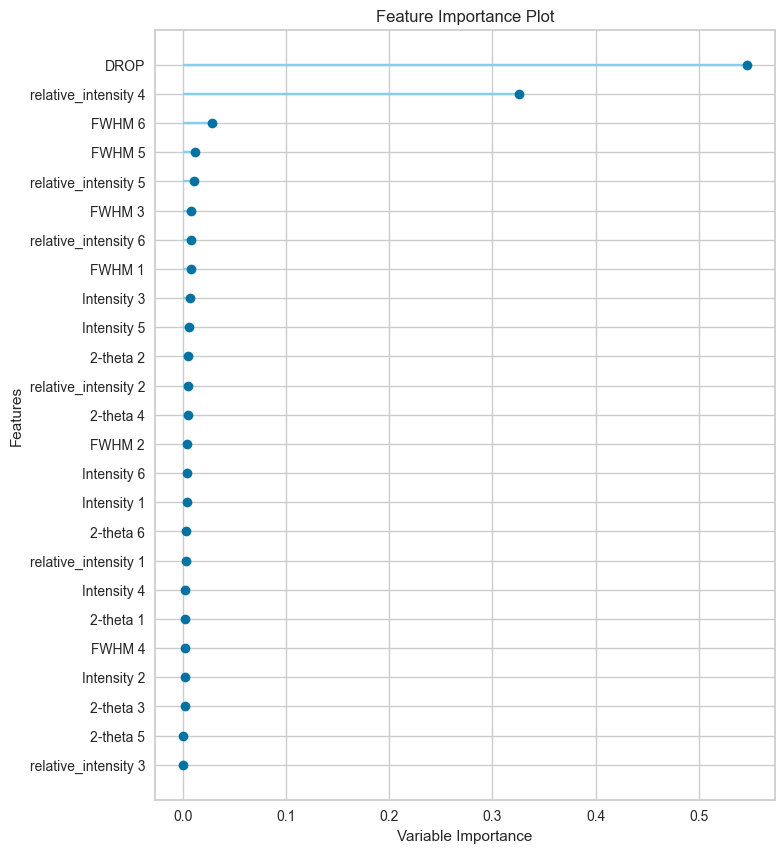

In [9]:
#gbr
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
plot_model(gbr, plot = 'feature_all')

In [6]:
interpret_model(gbr, plot='pfi')

25it [00:00, 94.95it/s]


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.8802,1.1775,1.0851,0.8317,0.0257,0.0212
Train,0.6853,0.7887,0.8881,0.8479,0.0203,0.0159


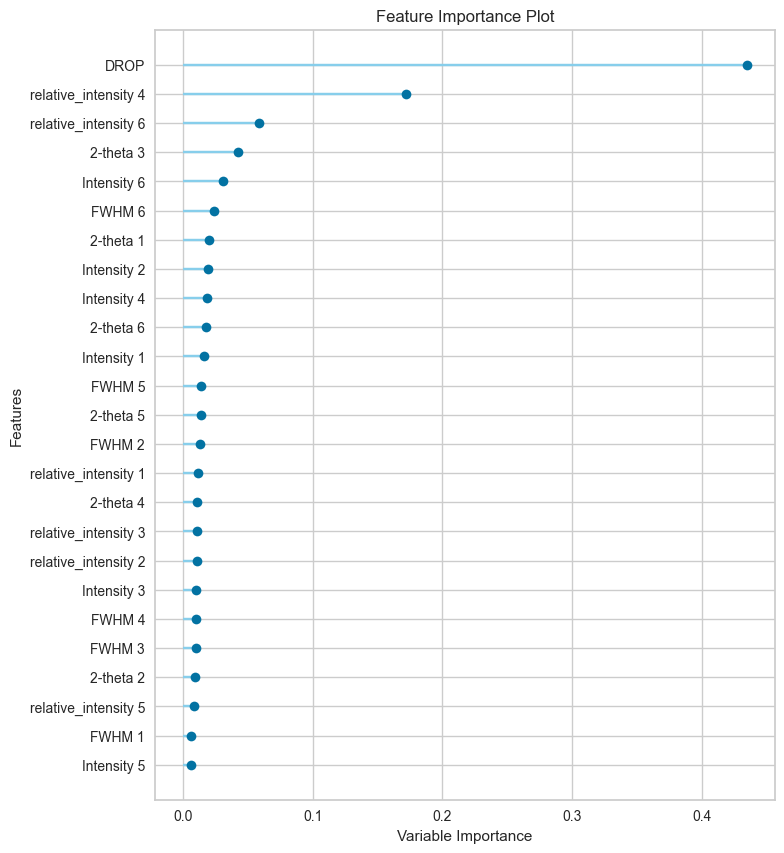

In [10]:
#rf
rf=create_model('rf',cross_validation = False, return_train_score=True)
plot_model(rf, plot = 'feature_all')

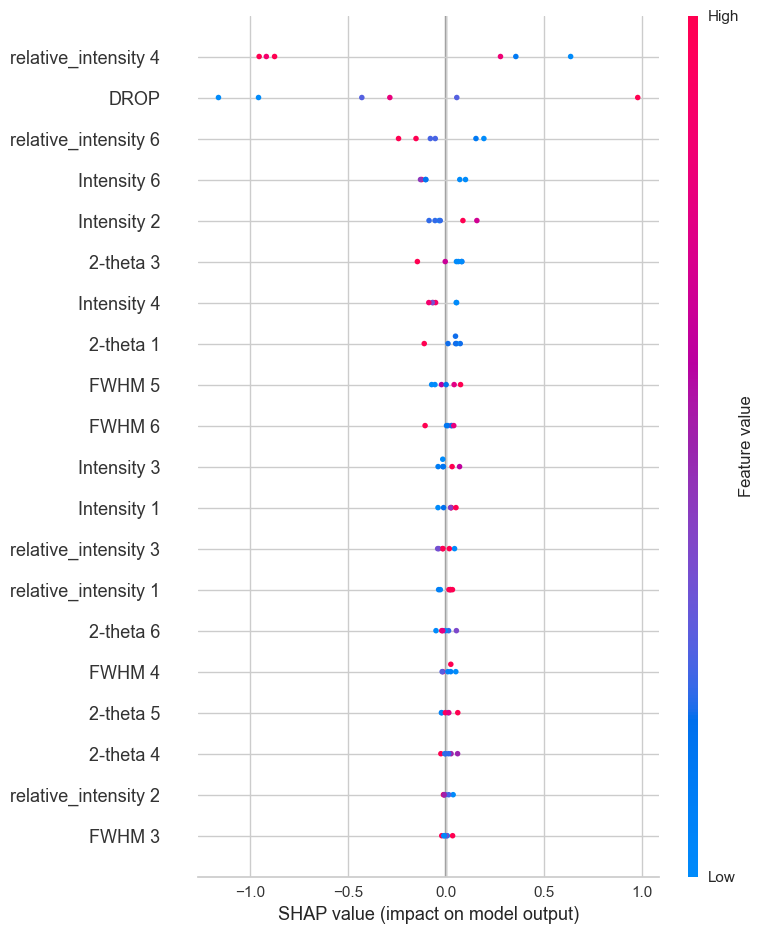

In [11]:
interpret_model(rf)

# 🟡 some features were removed automatically in this setup 


In [12]:


x=df.drop('Isc', axis=1)

reg = setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3

             ,ignore_features=['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6']

            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543)

Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pycaret\internal\logging.py", line 144, in create_logger
    ch = logging.FileHandler(path)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1169, in __init__
    StreamHandler.__init__(self, self._open())
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1201, in _open
    return open_func(self.baseFilename, self.mode,
PermissionError: [Errno 13] Permission denied: 'C:\\Program Files\\Microsoft VS Code\\logs.log'


,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 32)"
4,Transformed data shape,"(27, 15)"
5,Transformed train set shape,"(21, 15)"
6,Transformed test set shape,"(6, 15)"
7,Ignore features,6
8,Numeric features,25
9,Preprocess,True


In [13]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4170,0.2950,0.5431,0.9578,0.0116,0.0094,0.1200
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.1200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.2000
rf,Random Forest Regressor,0.8604,1.1369,1.0663,0.8375,0.0253,0.0207,0.3800
ada,AdaBoost Regressor,1.0534,1.1980,1.0945,0.8288,0.0244,0.0243,0.3100
et,Extra Trees Regressor,1.3089,1.7824,1.3351,0.7453,0.0306,0.0307,0.4000
lar,Least Angle Regression,1.2531,2.2217,1.4905,0.6825,0.0340,0.0293,0.0700
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.1100
ridge,Ridge Regression,1.1996,2.4122,1.5531,0.6553,0.0361,0.0286,0.0500
par,Passive Aggressive Regressor,1.3335,2.4576,1.5677,0.6488,0.0368,0.0320,0.0900


GBR

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4170,0.2950,0.5431,0.9578,0.0116,0.0094
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


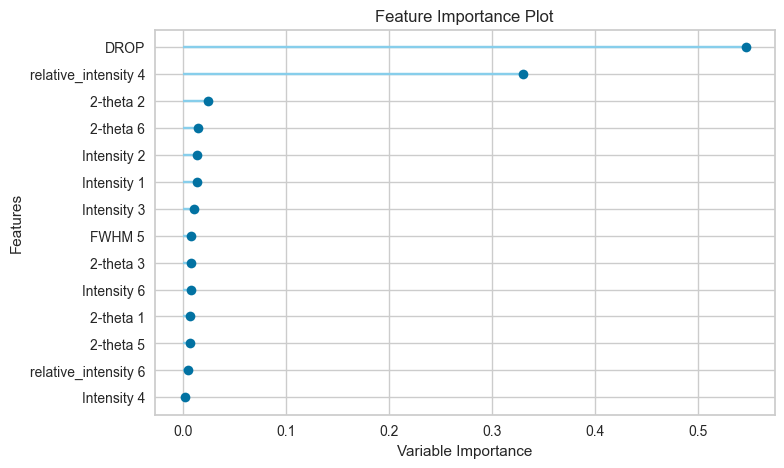

In [14]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
#evaluate_model(gbr)
plot_model(gbr, plot = 'feature_all')

In [15]:
#all rows(sample)
interpret_model(gbr, plot='pfi')

14it [00:00, 117.96it/s]


Permutation Feature Importance => pfi

In [ ]:
interpret_model(gbr, plot='msa')

In [ ]:
#sample1
specific_rows1 = x.iloc[[0,1,2,3,4,5], :]

# Get pfi for the specific rows
interpret_model(gbr, data=specific_rows1, plot='pfi')

In [ ]:
interpret_model(gbr, data=specific_rows1, plot='msa')

In [ ]:
#sample2
specific_rows2 = x.iloc[[6,7,8], :]

interpret_model(gbr, data=specific_rows2, plot='pfi')

In [ ]:
interpret_model(gbr, data=specific_rows2, plot='msa')

In [ ]:
#sample3
specific_rows3 = x.iloc[[9,10,11,12,13,14], :]

interpret_model(gbr, data=specific_rows3, plot='pfi')

In [ ]:
interpret_model(gbr, data=specific_rows3, plot='msa')

In [ ]:
#sample4
specific_rows4 = x.iloc[[15,16,17,18,19,20], :]

interpret_model(gbr, data=specific_rows4, plot='pfi')

In [ ]:
interpret_model(gbr, data=specific_rows4, plot='msa')

In [ ]:
#sample5
specific_rows5 = x.iloc[[21,22,23,24,25,26], :]

interpret_model(gbr, data=specific_rows5, plot='pfi')

In [ ]:
interpret_model(gbr, data=specific_rows5, plot='msa')

Rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.8604,1.1369,1.0663,0.8375,0.0253,0.0207
Train,0.6878,0.7775,0.8817,0.8501,0.0202,0.0159


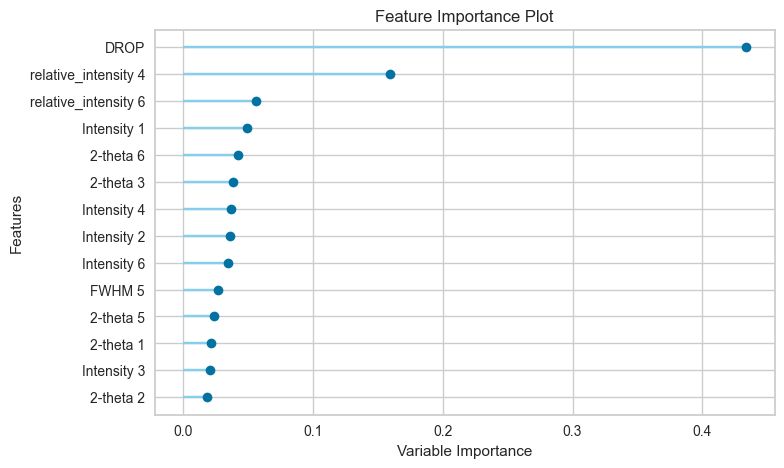

In [16]:
rf=create_model('rf',cross_validation = False, return_train_score=True)
plot_model(rf, plot = 'feature_all')

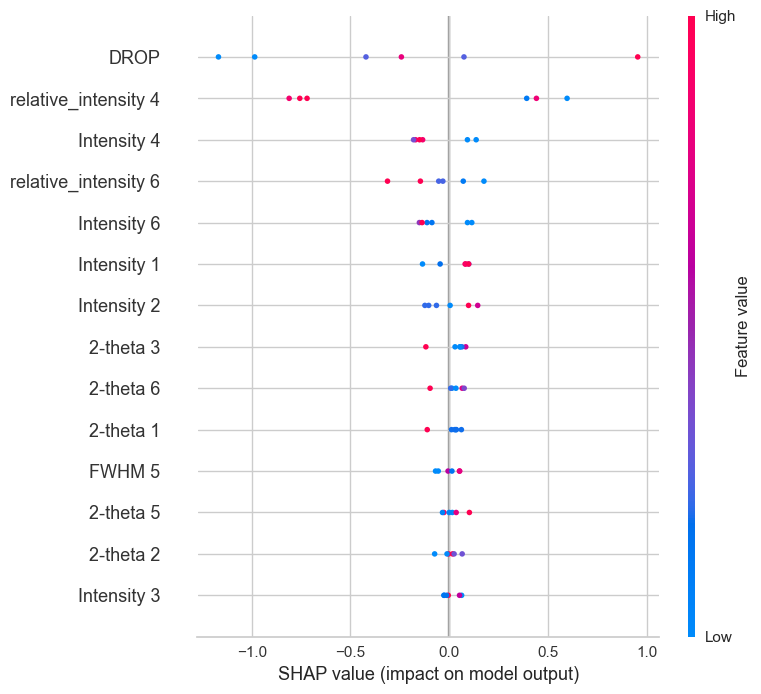

In [17]:
#all rows(samples)
interpret_model(rf, plot='summary')

In [18]:
#interpret_model(rf, plot='correlation')
interpret_model(rf, plot='pfi')

14it [00:00, 24.72it/s]


In [ ]:
#sample1
specific_rows1= x.iloc[[0, 1, 2,3,4,5], :]

# Get pfi for the specific rows
interpret_model(rf, data=specific_rows1, plot='pfi')

In [ ]:
#sample2
specific_rows2 = x.iloc[[6,7,8], :]

interpret_model(rf, data=specific_rows2, plot='pfi')

In [ ]:
#sample3
specific_rows3 = x.iloc[[9,10,11,12,13,14], :]

interpret_model(rf, data=specific_rows3, plot='pfi')

In [ ]:
#sample4
specific_rows4 = x.iloc[[15,16,17,18,19,20], :]

interpret_model(rf, data=specific_rows4, plot='pfi')

In [ ]:
#sample5
specific_rows5 = x.iloc[[21,22,23,24,25,26], :]

interpret_model(rf, data=specific_rows5, plot='pfi')

# ordinal Encoding

In [11]:
x=df.drop('Isc', axis=1)

reg= setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3
           ,ordinal_features= { 'DROP' : [1,2,3,4,5,6] }

             ,ignore_features=['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6']

            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543)

Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pycaret\internal\logging.py", line 144, in create_logger
    ch = logging.FileHandler(path)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1169, in __init__
    StreamHandler.__init__(self, self._open())
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1201, in _open
    return open_func(self.baseFilename, self.mode,
PermissionError: [Errno 13] Permission denied: 'C:\\Program Files\\Microsoft VS Code\\logs.log'


,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 32)"
4,Transformed data shape,"(27, 15)"
5,Transformed train set shape,"(21, 15)"
6,Transformed test set shape,"(6, 15)"
7,Ignore features,6
8,Ordinal features,1
9,Numeric features,25


In [12]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4193,0.2960,0.5440,0.9577,0.0117,0.0094,0.2200
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.8600
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.5500
rf,Random Forest Regressor,0.8990,1.2365,1.1120,0.8233,0.0263,0.0217,0.2600
ada,AdaBoost Regressor,1.1757,1.4449,1.2020,0.7935,0.0270,0.0273,0.8200
et,Extra Trees Regressor,1.3089,1.7824,1.3351,0.7453,0.0306,0.0307,0.1900
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.5300
lar,Least Angle Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.2200
ridge,Ridge Regression,1.1996,2.4122,1.5531,0.6553,0.0361,0.0286,0.7800
par,Passive Aggressive Regressor,1.3335,2.4576,1.5677,0.6488,0.0368,0.0320,0.2700


In [13]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4193,0.2960,0.5440,0.9577,0.0117,0.0094
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…